<a href="https://colab.research.google.com/github/SnehalYu/Query-Auto-Completion-/blob/main/Copy_of_ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import math
import re
import requests
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
from math import exp


# Laod NLTK, NLTK functions, and related utilities
try:
    # This is for using the functions from the NLTK library
    # Testing whether library load works.
    # Sometimes, it doesn't work on some machines because of setup issues.
    import nltk

except:
    !pip install nltk

from nltk.tokenize import ToktokTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk import FreqDist

# This is to download stop words for cleaning the text
import nltk
nltk.download('stopwords')

# Downloading the dataset
url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
text = requests.get(url).content.decode('utf8')
with io.open('language-never-random.txt', 'w', encoding='utf8') as fout:
 fout.write(text)

# Tolenization
sent_tokenize = lambda x: re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', x)
char_tokenize = lambda x: list(x)
toktok = ToktokTokenizer()
word_tokenize = char_tokenize
tokens = word_tokenize(text[:500])
word_tokenize(sent_tokenize(text)[0])

# N-gram Generation
# Trigram
padded_sent_tri = list(
    pad_sequence(text[:500],
                 pad_left=True, left_pad_symbol="<s>",
                 pad_right=True, right_pad_symbol="</s>",
                 n=3))
tri_grams = list(ngrams(padded_sent_tri, n=3))
#Fourgram
padded_sent_four = list(
    pad_sequence(text[:500],
                 pad_left=True, left_pad_symbol="<s>",
                 pad_right=True, right_pad_symbol="</s>",
                 n=4))
four_grams = list(ngrams(padded_sent_four, n=4))

# Preprocessing (coverts the text into lowercase)
tokenized_text = [list(map(str.lower, word_tokenize(sent))) for sent in sent_tokenize(text[:500])]
tokenized_text[0]
print(tokenized_text)

#Model Training
train_data, padded_sents = padded_everygram_pipeline(3, tokenized_text)
model = MLE(3)
#Model Fitting
model.fit(train_data, padded_sents)
print(model.vocab)
print(len(model.vocab))

print(model.vocab.lookup(tokenized_text[0]))
print(model.vocab.lookup('f i z x .'.split()))
x=model.counts[['t', 'h']]['e']
y=0
for i in model.vocab:
  y+=model.counts[['t','h']][i]
print(x/y)

#perplexity
perplexity = exp(model.entropy(tokenized_text))
print(perplexity)

[['f', 'i', 'r', 's', 't', ' ', 'c', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'b', 'e', 'f', 'o', 'r', 'e', ' ', 'w', 'e', ' ', 'p', 'r', 'o', 'c', 'e', 'e', 'd', ' ', 'a', 'n', 'y', ' ', 'f', 'u', 'r', 't', 'h', 'e', 'r', ',', ' ', 'h', 'e', 'a', 'r', ' ', 'm', 'e', ' ', 's', 'p', 'e', 'a', 'k', '.', '\n', '\n', 'a', 'l', 'l', ':', '\n', 's', 'p', 'e', 'a', 'k', ',', ' ', 's', 'p', 'e', 'a', 'k', '.', '\n', '\n', 'f', 'i', 'r', 's', 't', ' ', 'c', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 'r', 'e', 's', 'o', 'l', 'v', 'e', 'd', ' ', 'r', 'a', 't', 'h', 'e', 'r', ' ', 't', 'o', ' ', 'd', 'i', 'e', ' ', 't', 'h', 'a', 'n', ' ', 't', 'o', ' ', 'f', 'a', 'm', 'i', 's', 'h', '?', '\n', '\n', 'a', 'l', 'l', ':', '\n', 'r', 'e', 's', 'o', 'l', 'v', 'e', 'd', '.', ' ', 'r', 'e', 's', 'o', 'l', 'v', 'e', 'd', '.', '\n', '\n', 'f', 'i', 'r', 's', 't', ' ', 'c', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'f', 'i', 'r', 's', 't', ',', ' ', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


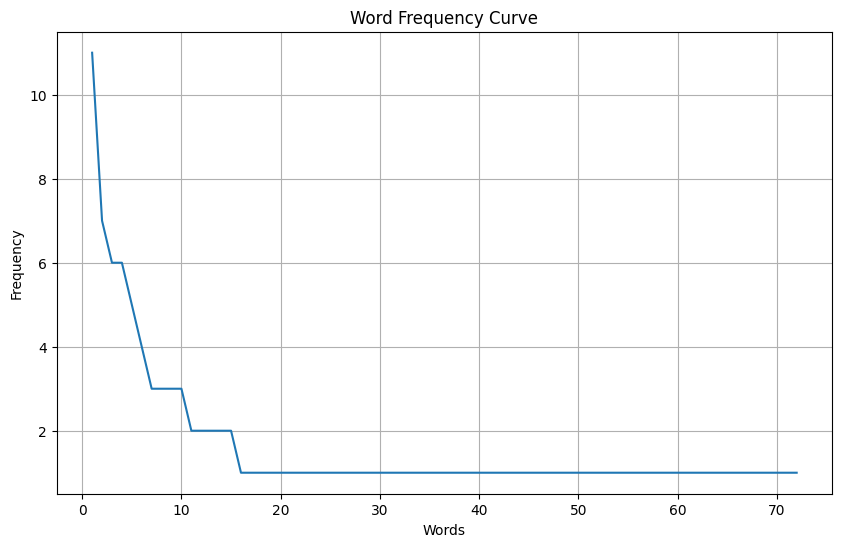

In [ ]:
import os
import sys
import gc
import warnings
import logging
import math
import re
import requests
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell


# Laod NLTK, NLTK functions, and related utilities
try:
    # This is for using the functions from the NLTK library
    # Testing whether library load works.
    # Sometimes, it doesn't work on some machines because of setup issues.
    import nltk

except:
    !pip install nltk

from nltk.tokenize import ToktokTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk import FreqDist

# This is to download stop words for cleaning the text
import nltk
nltk.download('stopwords')

if os.path.isfile('language-never-random.txt'):
    with io.open('language-never-random.txt', encoding='utf8') as fin:
        text = fin.read()
else:
    url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
    text = requests.get(url).content.decode('utf8')
    with io.open('language-never-random.txt', 'w', encoding='utf8') as fout:
        fout.write(text)




import nltk
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset

with open('language-never-random.txt', "r") as file:
    dataset_text = file.read()

# Tokenize the dataset into words
sent_tokenize = lambda x: re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', x)
toktok = ToktokTokenizer()
word_tokenize = toktok.tokenize
tokens=word_tokenize(text[:500])
word_tokenize(sent_tokenize(text[:500])[0])

# Calculate word frequencies
word_freq = nltk.FreqDist(tokens)

# Sort word frequencies in descending order
sorted_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

# Prepare data for plotting
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = [freq for _, freq in sorted_freq]

# Plot the word frequency curve
plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Curve")
plt.grid(True)
plt.show()